<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 1 / NOTE 3*

# 📝 Assignment
---

# Ridge Regression

이번 모듈에서 배운 내용을 조금 다른 데이터를 통해 복습해 봅시다. 데이터에 대한 정보는 다음 링크를 참조해 주세요.

- [Melbourne Housing Market]('https://www.kaggle.com/anthonypino/melbourne-housing-market')

이번에도 Price 변수를 target으로 정하고 모델을 구성해 봅시다.

In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split

# get data
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/melbourne_house_prices/MELBOURNE_HOUSE_PRICES_LESS.csv')

# drop high cardinality cols
df.drop(columns=['Suburb','Address','SellerG','Date'], inplace=True)

# drop na values in Price
df.dropna(subset=['Price'], inplace=True)
display(df)
# drop duplicated rows
df.drop_duplicates(inplace=True)

display(df)

Rooms Type  ...  Distance                 CouncilArea
0          3    h  ...       3.0          Yarra City Council
1          3    h  ...       3.0          Yarra City Council
2          3    h  ...       3.0          Yarra City Council
3          3    h  ...       7.5  Moonee Valley City Council
4          2    h  ...      10.4  Moonee Valley City Council
...      ...  ...  ...       ...                         ...
63016      2    u  ...      38.0      Frankston City Council
63017      3    h  ...       8.4        Darebin City Council
63018      3    h  ...      20.6           Hume City Council
63019      3    h  ...      20.6           Hume City Council
63020      3    h  ...      20.6           Hume City Council

[48433 rows x 9 columns]

Rooms Type  ...  Distance                 CouncilArea
0          3    h  ...       3.0          Yarra City Council
1          3    h  ...       3.0          Yarra City Council
2          3    h  ...       3.0          Yarra City Council
3          3    h  ...       7.5  Moonee Valley City Council
4          2    h  ...      10.4  Moonee Valley City Council
...      ...  ...  ...       ...                         ...
63015      2    u  ...      38.0      Frankston City Council
63016      2    u  ...      38.0      Frankston City Council
63017      3    h  ...       8.4        Darebin City Council
63018      3    h  ...      20.6           Hume City Council
63020      3    h  ...      20.6           Hume City Council

[42515 rows x 9 columns]

### 1) 데이터의 특성을 파악하기 위해 pandas_profiling을 사용해 보세요.
- **범주형 특성으로 원핫인코딩이 꼭 필요한 특성의 갯수를 과제 제출폼에 제출하세요.**

In [2]:
# !pip install pandas_profiling
# !pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [3]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
profile

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Pandas Profiling 결과
## Variable types
- Numeric 변수 = 6 개
- Categorical 변수 = 4 개
## Dataset 통계
- 변수 개수 : 10 개
- 샘플의 수 : 42515 개
- 결측치 : 0 개
- 중복 행 : 0 개
## 변수 특징
 1. df_index : Real number, 인덱스
    - UNIQUE 한 변수. 연관 없는 변수.
 2. Rooms : Real number, 객실 수
    - 분포 : 1 ~ 31
    - Type과 높은 상관관계를 가지고 있음
 3. Type : Categorical, 타입. h : 하우스, u : 유닛, t : 타운 하우스
    - h : 29637, u : 8360, t : 4518
    - Rooms와 높은 상관관계를 가지고 있음
 4. Price : Real number, 가격
    - 분포 : 85,000 ~ 11,200,000
 5. Method : Categorical, 판매 된 방법. S : 부동산 매각, SP : 이전에 매각 된 부동산, PI : 전달 된 속성, VB : 공급 업체 입찰, SA : 경매 후 판매
    - S : 26738, SP : 5830, PI : 5361, VB : 4235, SA : 351
 6. Postcode : Real number, 우편번호
    - 분포 : 3000 ~ 3980
    - Distance, Regionname, CouncilArea와 높은 상관관계를 가지고 있음
 7. Regionname : Categorical, 지역명
    - Northern, Southern, Western, Eastern, South-Eastern, Other values
    - Postcode, Distance, CouncilArea와 높은 상관관계를 가지고 있음
 8. Propertycount : Real number, 교외에있는 부동산 수.
    - 분포 : 39 ~ 21650
    - Distance, CouncilArea와 높은 상관 관계를 가지고 있음.
 9. Distance : Real number, CBD로부터의 거리 (킬로미터)
    - 분포 : 0 ~ 55.8
    - Podstcode, Regionname, Propertycount, CouncilArea와 높은 상관관계를 가지고 있음.
 10. CouncilArea : Categorical, 해당 지역의 관할위원회
    - Boroondara, Darebin, Banyule, Brimbank, Bayside, Other values
    - Postcode, Regionname, Propertycount, Distance와 높은 상관관계를 가지고 있음.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42515 entries, 0 to 63020
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          42515 non-null  int64  
 1   Type           42515 non-null  object 
 2   Price          42515 non-null  float64
 3   Method         42515 non-null  object 
 4   Postcode       42515 non-null  int64  
 5   Regionname     42515 non-null  object 
 6   Propertycount  42515 non-null  int64  
 7   Distance       42515 non-null  float64
 8   CouncilArea    42515 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 3.2+ MB


In [5]:
onehot_df = df.iloc[:, [i for i in df.dtypes == object]]
onehot_df

Type Method                  Regionname                 CouncilArea
0        h      S       Northern Metropolitan          Yarra City Council
1        h      S       Northern Metropolitan          Yarra City Council
2        h      S       Northern Metropolitan          Yarra City Council
3        h      S        Western Metropolitan  Moonee Valley City Council
4        h      S        Western Metropolitan  Moonee Valley City Council
...    ...    ...                         ...                         ...
63015    u     SP  South-Eastern Metropolitan      Frankston City Council
63016    u     SP  South-Eastern Metropolitan      Frankston City Council
63017    h      S       Northern Metropolitan        Darebin City Council
63018    h      S       Northern Metropolitan           Hume City Council
63020    h      S       Northern Metropolitan           Hume City Council

[42515 rows x 4 columns]

In [6]:
len(onehot_df.columns)

4

### 2) 범주형 변수들에 대해 one-hot encoding(category_encoders)을 수행하고 데이터를 train/test 셋으로 무작위로 나누어 주세요.(train/test = 80%/20%)
- [category_encoders.one_hot.OneHotEncoder](https://contrib.scikit-learn.org/category_encoders/onehot.html#one-hot), 파라미터는 use_cat_names = True 사용
- 데이터 분리는 [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train%20test%20split#sklearn-model-selection-train-test-split) 을 사용해 주세요. 사용해야 하는 파라미터는 test_size, train_size, random_state=2 입니다. 나머지는 default 사용합니다.
- **분리된 학습데이터의 첫번째 샘플의 인덱스 값를 과제 제출폼에 제출하세요.**


In [7]:
X = df.drop('Price', axis = 1)
y = df['Price']

In [8]:
# 2가지 방법 : get_dummies, category_encoders.OneHotEncoder
# get_dummies
pd.get_dummies(X)

Rooms  ...  CouncilArea_Yarra Ranges Shire Council
0          3  ...                                       0
1          3  ...                                       0
2          3  ...                                       0
3          3  ...                                       0
4          2  ...                                       0
...      ...  ...                                     ...
63015      2  ...                                       0
63016      2  ...                                       0
63017      3  ...                                       0
63018      3  ...                                       0
63020      3  ...                                       0

[42515 rows x 54 columns]

In [9]:
# category_encoders.OneHotEncoder
# !pip install category_encoders
import category_encoders as ce

ce_one_hot = ce.OneHotEncoder(use_cat_names = True)
onehotencoder_df = ce_one_hot.fit_transform(X, y)
onehotencoder_df

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Rooms  ...  CouncilArea_Murrindindi Shire Council
0          3  ...                                      0
1          3  ...                                      0
2          3  ...                                      0
3          3  ...                                      0
4          2  ...                                      0
...      ...  ...                                    ...
63015      2  ...                                      0
63016      2  ...                                      0
63017      3  ...                                      0
63018      3  ...                                      0
63020      3  ...                                      0

[42515 rows x 54 columns]

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(onehotencoder_df, y, test_size=0.20, random_state=2)

In [11]:
X_train

Rooms  ...  CouncilArea_Murrindindi Shire Council
602        4  ...                                      0
40851      5  ...                                      0
57233      4  ...                                      0
8816       4  ...                                      0
3481       3  ...                                      0
...      ...  ...                                    ...
44542      3  ...                                      0
43399      2  ...                                      0
8789       6  ...                                      0
51700      3  ...                                      0
33935      3  ...                                      0

[34012 rows x 54 columns]

In [12]:
y_train

602      1750000.0
40851     900000.0
57233     530000.0
8816      975000.0
3481      556000.0
           ...    
44542     695000.0
43399     490000.0
8789      830000.0
51700     380000.0
33935    1516000.0
Name: Price, Length: 34012, dtype: float64

### 3) SelectKBest를 사용해서 20개의 특성만 selection 하세요
- score_func 에는 f_regression을 사용합니다
- **가장 스코어(Attributes: scores_ 사용)가 높게 나온 특성의 이름을 과제 제출폼에 제출하세요.**

In [13]:
# 특성자동선택 SelectKBest(개수), SelectPercentile(비율)
def mySelectKBest(X, y, n):
  from sklearn.feature_selection import SelectKBest, f_regression
  
  select = SelectKBest(f_regression, k=n).fit(X, y)
  X_selected = select.transform(X)

  # 점수 표 내림 차순
  score = select.scores_
  import pandas as pd
  print('\n점수 표 내림 차순')
  display(pd.DataFrame([score], index = ['score'], columns = X.columns).sort_values(by = 'score', axis = 1, ascending = False))

  # X 형태
  print('\nX 형태 변환 과정')
  print("X.shape: {} ".format(X.shape))
  print("X_selected.shape: {} ".format(X_selected.shape))
  
  # 마스킹 시각화 검은 부분이 True, 흰 부분이 False
  mask = select.get_support()
  import matplotlib.pyplot as plt
  plt.matshow(mask.reshape(1, -1), cmap='gray_r')
  plt.xlabel("feature number")
  plt.yticks([0])
  plt.title("RFE")
  print('\n마스킹 시각화. True = Black, False = White')
  plt.show()

  # 출력
  print('\nOutput :')
  print('{}개의 pvalue 값에 따른 최고 점수의 feature : {} 선택'.format(n, list(X.iloc[:,mask].columns)))
  display(X.iloc[:,mask])


점수 표 내림 차순


Rooms  ...  CouncilArea_Hobsons Bay City Council
score  7014.026028  ...                              0.055165

[1 rows x 54 columns]


X 형태 변환 과정
X.shape: (34012, 54) 
X_selected.shape: (34012, 20) 

마스킹 시각화. True = Black, False = White


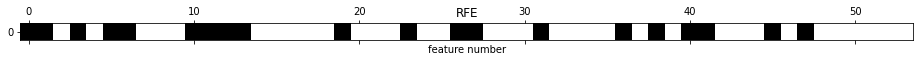


Output :
20개의 pvalue 값에 따른 최고 점수의 feature : ['Rooms', 'Type_h', 'Type_u', 'Method_SP', 'Method_VB', 'Regionname_Northern Metropolitan', 'Regionname_Western Metropolitan', 'Regionname_Southern Metropolitan', 'Regionname_South-Eastern Metropolitan', 'Distance', 'CouncilArea_Brimbank City Council', 'CouncilArea_Stonnington City Council', 'CouncilArea_Boroondara City Council', 'CouncilArea_Bayside City Council', 'CouncilArea_Hume City Council', 'CouncilArea_Manningham City Council', 'CouncilArea_Melton City Council', 'CouncilArea_Frankston City Council', 'CouncilArea_Whittlesea City Council', 'CouncilArea_Wyndham City Council'] 선택


Rooms  ...  CouncilArea_Wyndham City Council
602        4  ...                                 0
40851      5  ...                                 0
57233      4  ...                                 0
8816       4  ...                                 0
3481       3  ...                                 0
...      ...  ...                               ...
44542      3  ...                                 0
43399      2  ...                                 0
8789       6  ...                                 0
51700      3  ...                                 0
33935      3  ...                                 0

[34012 rows x 20 columns]

In [14]:
mySelectKBest(X_train, y_train, 20)

### 4) RidgeCV를 사용해서 회귀모델을 만들어 보세요
- attribute는 normalize=True, cv=5를 사용하세요. 나머지는 default
- **alphas = [0, 0.001, 0.01, 0.1, 1] 을 시도해보고 가장 좋은 점수가 나온 alpha 값을 과제 제출폼에 제출하세요.**

alpha 매개변수로 훈련 센트의 성능 대비 모델을 얼마나 단순화할지를 지정할 수 있다. (기본값 alpha=1.0) 높을수록 단순화 됨.

alpha값을 높이면 계수를 0에 더 가깝게 만들어 훈련세트의 성능은 나빠지지만 일반화에는 쉬워진다.

In [15]:
from sklearn.linear_model import RidgeCV
clf = RidgeCV(normalize = True, cv = 5, alphas=[0, 0.001, 0.01, 0.1, 1]).fit(X_train, y_train)
clf.score(X_train, y_train)

0.5714598170843648

In [16]:
# alpha_per_target -> 0.24 버전에서 새로 업데이트 되었다.
# !pip install scikit-learn==0.24
from sklearn.linear_model import RidgeCV

alphas = [0, 0.001, 0.01, 0.1, 1] 

ridge = RidgeCV(alphas=alphas, normalize=True, cv=5)
ridge.fit(X_train, y_train)
print("alpha: ", ridge.alpha_)
print("best score: ", ridge.best_score_)

alpha:  0.001
best score:  0.570582337167096


In [31]:
ridge = RidgeCV(alphas=[0.001], normalize=True, cv = 5)
ridge.fit(X_train, y_train)
print("alpha: ", ridge.alpha_)
print("best score: ", ridge.best_score_)

alpha:  0.001
best score:  0.570582337167096


In [32]:
ridge = RidgeCV(alphas=[0.01], normalize=True, cv = 5)
ridge.fit(X_train, y_train)
print("alpha: ", ridge.alpha_)
print("best score: ", ridge.best_score_)

alpha:  0.01
best score:  0.5704066347615535


In [33]:
ridge = RidgeCV(alphas=[0.1], normalize=True, cv = 5)
ridge.fit(X_train, y_train)
print("alpha: ", ridge.alpha_)
print("best score: ", ridge.best_score_)

alpha:  0.1
best score:  0.5641057147809634


In [34]:
ridge = RidgeCV(alphas=[1], normalize=True, cv = 5)
ridge.fit(X_train, y_train)
print("alpha: ", ridge.alpha_)
print("best score: ", ridge.best_score_)

alpha:  1
best score:  0.46651168047699


alpha 가 0.001일 때 점수가 제일 높다.

아래는 그래프로 시각화. 

서로 비슷해 보이지만, 최고점, 최저점을 위주로 분포를 비교하면 차이가 보인다.

In [87]:
ridge0001 = RidgeCV(alphas=[0.001], normalize=True, cv = 5).fit(X_train, y_train)
ridge001 = RidgeCV(alphas=[0.01], normalize=True, cv = 5).fit(X_train, y_train)
ridge01 = RidgeCV(alphas=[0.1], normalize=True, cv = 5).fit(X_train, y_train)
ridge1 = RidgeCV(alphas=[1], normalize=True, cv = 5).fit(X_train, y_train)

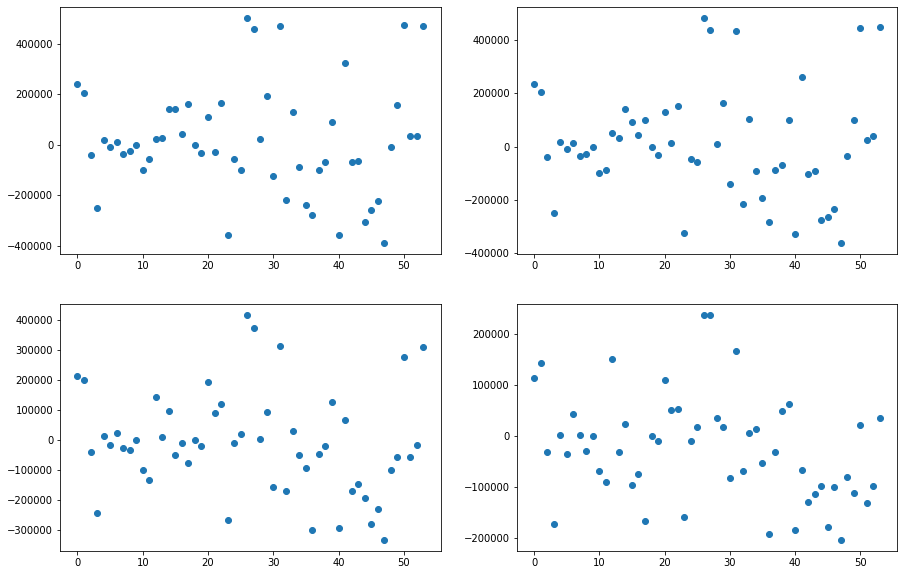

In [88]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(2,2, figsize = (15, 10))
ax[0][0].plot(ridge0001.coef_, 'o');
ax[0][1].plot(ridge001.coef_, 'o');
ax[1][0].plot(ridge01.coef_, 'o');
ax[1][1].plot(ridge1.coef_, 'o');

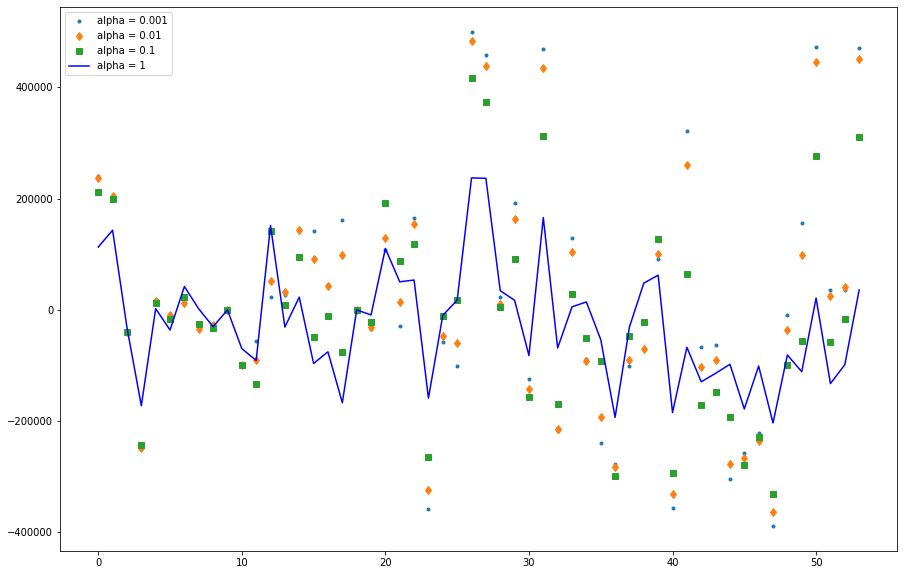

In [112]:
plt.figure(figsize = (15,10))
plt.plot(ridge0001.coef_, '.', label = 'alpha = 0.001');
plt.plot(ridge001.coef_, 'd', label = 'alpha = 0.01');
plt.plot(ridge01.coef_, 's', label = 'alpha = 0.1');
plt.plot(ridge1.coef_, 'b', label = 'alpha = 1');
plt.legend();

alpha 값이 커질수록 회귀계수가 0에 가까워지는 것을 확인 할 수 있다.

### 5) 테스트셋에 대한 MAE 값을 계산하고 모델이 잘 만들어졌는지 확인해 보세요.
- **테스트셋에 대한 MAE 값을 과제 제출폼에 제출하세요.**

In [43]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y_train)

print('LinearRegresssion')
print("훈련 세트의 정확도 : {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트의 정확도 : {:.2f}".format(lr.score(X_test, y_test)))

LinearRegresssion
훈련 세트의 정확도 : 0.57
테스트 세트의 정확도 : 0.59


In [52]:
from sklearn.metrics import mean_absolute_error, r2_score

model = RidgeCV(normalize = True, cv = 5, alphas=alphas).fit(X_train, y_train)

print('RidgeCV')
print('훈련 세트의 정확도 : {:.2f}'.format(model.score(X_train, y_train)))
print('테스트 세트의 정확도 : {:.2f}\n'.format(model.score(X_test, y_test)))

y_pred_train = model.predict(X_train)
mae_train = mean_absolute_error(y_train, y_pred_train)

y_pred_test = model.predict(X_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

print('훈련 세트의 R^2 점수 : {:.2f}'.format(r2_score(y_train, y_pred_train)))
print('테스트 세트의 R^2 점수 : {:.2f}'.format(r2_score(y_test, y_pred_test)))

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

RidgeCV
훈련 세트의 정확도 : 0.57
테스트 세트의 정확도 : 0.59

훈련 세트의 R^2 점수 : 0.57
테스트 세트의 R^2 점수 : 0.59


In [53]:
mae_test

255008.682817829

In [54]:
r2_train

0.5712140189747146

In [55]:
r2_test

0.5879922559309355

In [ ]:
# 잘 만들어 졌다 !
# R^2 값이 0.60을 안넘는게 아쉽지만 트레인 정확도보다 테스트 세트의 정확도가 더 높다.. 

## 🔥 도전과제

### 6) best ridge regression model을 만드세요.
    - 특성의 갯수에 제한이 없습니다.
    - 다항회귀를 사용하세요
    - 여러 람다값을 시도하세요
    - 람다 0인 경우를 비교하세요
    - RidgeCV를 사용하세요
    - 만든 모델의 특징을 간략히 설명하고 테스트세트 성능 결과를 메신저에서 공유하세요

1. OneHotEncoding으로 Columns를 54개로 늘렸다.
2. train set, test set 80 : 20 의 비율로 나누었다.
3. KBest로 우선도 높은 순서대로 하나씩 Column을 늘려가며 RidgeCV로 트레이닝 셋만 트레이닝 하였다.
4. RidgeCV의 cv 값은 5로 고정 하였고, alpha는 [0, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0] 중 가장 적합한 alpha 값을 선택 하도록 하였다.
5. RidgeCV로 트레이닝 하면서 나오는 Column 개수, Column 이름, best_alpha, 트레인 점수, 테스트 점수들을 구해서 데이터 프레임에 저장하였다.

In [249]:
X_train

Rooms  ...  CouncilArea_Murrindindi Shire Council
602        4  ...                                      0
40851      5  ...                                      0
57233      4  ...                                      0
8816       4  ...                                      0
3481       3  ...                                      0
...      ...  ...                                    ...
44542      3  ...                                      0
43399      2  ...                                      0
8789       6  ...                                      0
51700      3  ...                                      0
33935      3  ...                                      0

[34012 rows x 54 columns]

In [246]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import RidgeCV
import pandas as pd

rid_score = pd.DataFrame()

X = X_train
y = y_train

alphas = [0] + [(10**i)/100000 for i in range(0, 6, 1)]

for i in range(len(X_train.columns)):
  select = SelectKBest(f_regression, k=i+1).fit(X, y)
  mask = select.get_support()
  ridge = RidgeCV(alphas = alphas, normalize = True, cv = 5).fit(X[X.columns[mask]], y)
  rid_score = pd.concat([rid_score, pd.DataFrame({'Feature_num' : [i+1], 'Feature' : str(list(X.columns[mask])), 'best_alpha' : [ridge.alpha_], 'train_score' : [ridge.score(X[X.columns[mask]], y)], 'test_score' : [ridge.score(X_test[X_test.columns[mask]], y_test)]})])

In [240]:
rid_score.set_index('Feature_num').sort_values('test_score', ascending = False)

Feature  ...  test_score
Feature_num                                                     ...            
53           ['Rooms', 'Type_h', 'Type_t', 'Type_u', 'Metho...  ...    0.587800
52           ['Rooms', 'Type_h', 'Type_t', 'Type_u', 'Metho...  ...    0.587797
54           ['Rooms', 'Type_h', 'Type_t', 'Type_u', 'Metho...  ...    0.587778
50           ['Rooms', 'Type_h', 'Type_t', 'Type_u', 'Metho...  ...    0.587201
51           ['Rooms', 'Type_h', 'Type_t', 'Type_u', 'Metho...  ...    0.587201
49           ['Rooms', 'Type_h', 'Type_t', 'Type_u', 'Metho...  ...    0.587129
43           ['Rooms', 'Type_h', 'Type_t', 'Type_u', 'Metho...  ...    0.585539
46           ['Rooms', 'Type_h', 'Type_t', 'Type_u', 'Metho...  ...    0.585525
48           ['Rooms', 'Type_h', 'Type_t', 'Type_u', 'Metho...  ...    0.585504
47           ['Rooms', 'Type_h', 'Type_t', 'Type_u', 'Metho...  ...    0.585503
44           ['Rooms', 'Type_h', 'Type_t', 'Type_u', 'Metho...  ...    0.585379
45           ['Rooms', 'Type_h', 'Type_t', 'Type_u', 'Metho...  ...    0.585339
42           ['Rooms', 'Type_h', 'Type_t', 'Type_u', 'Metho...  ...    0.583969
41           ['Rooms', 'Type_h', 'Type_t', 'Type_u', 'Metho...  ...    0.583947
39           ['Rooms', 'Type_h', 'Type_t', 'Type_u', 'Metho...  ...    0.583565
40           ['Rooms', 'Type_h', 'Type_t', 'Type_u', 'Metho...  ...    0.583535
38           ['Rooms', 'Type_h', 'Type_t', 'Type_u', 'Metho...  ...    0.582389
37           ['Rooms', 'Type_h', 'Type_t', 'Type_u', 'Metho...  ...    0.580916
36           ['Rooms', 'Type_h', 'Type_t', 'Type_u', 'Metho...  ...    0.580859
35           ['Rooms', 'Type_h', 'Type_t', 'Type_u', 'Metho...  ...    0.580643
33           ['Rooms', 'Type_h', 'Type_t', 'Type_u', 'Metho...  ...    0.579489
34           ['Rooms', 'Type_h', 'Type_t', 'Type_u', 'Metho...  ...    0.579434
32           ['Rooms', 'Type_h', 'Type_t', 'Type_u', 'Metho...  ...    0.574821
31           ['Rooms', 'Type_h', 'Type_t', 'Type_u', 'Metho...  ...    0.574022
29           ['Rooms', 'Type_h', 'Type_t', 'Type_u', 'Metho...  ...    0.573983
30           ['Rooms', 'Type_h', 'Type_t', 'Type_u', 'Metho...  ...    0.573962
28           ['Rooms', 'Type_h', 'Type_t', 'Type_u', 'Metho...  ...    0.573432
27           ['Rooms', 'Type_h', 'Type_t', 'Type_u', 'Metho...  ...    0.573251
23           ['Rooms', 'Type_h', 'Type_u', 'Method_SP', 'Me...  ...    0.572279
25           ['Rooms', 'Type_h', 'Type_t', 'Type_u', 'Metho...  ...    0.572241
24           ['Rooms', 'Type_h', 'Type_u', 'Method_SP', 'Me...  ...    0.572241
26           ['Rooms', 'Type_h', 'Type_t', 'Type_u', 'Metho...  ...    0.572194
21           ['Rooms', 'Type_h', 'Type_u', 'Method_SP', 'Me...  ...    0.570318
22           ['Rooms', 'Type_h', 'Type_u', 'Method_SP', 'Me...  ...    0.570290
20           ['Rooms', 'Type_h', 'Type_u', 'Method_SP', 'Me...  ...    0.569139
19           ['Rooms', 'Type_h', 'Type_u', 'Method_SP', 'Me...  ...    0.567841
18           ['Rooms', 'Type_h', 'Type_u', 'Method_SP', 'Me...  ...    0.567725
17           ['Rooms', 'Type_h', 'Type_u', 'Method_SP', 'Me...  ...    0.566806
16           ['Rooms', 'Type_h', 'Type_u', 'Method_SP', 'Me...  ...    0.563806
15           ['Rooms', 'Type_h', 'Type_u', 'Method_SP', 'Re...  ...    0.563797
14           ['Rooms', 'Type_h', 'Type_u', 'Regionname_Nort...  ...    0.563402
13           ['Rooms', 'Type_h', 'Type_u', 'Regionname_Nort...  ...    0.558920
12           ['Rooms', 'Type_h', 'Type_u', 'Regionname_Nort...  ...    0.557204
11           ['Rooms', 'Type_h', 'Type_u', 'Regionname_Nort...  ...    0.552486
10           ['Rooms', 'Type_h', 'Type_u', 'Regionname_Nort...  ...    0.550051
9            ['Rooms', 'Type_h', 'Type_u', 'Regionname_Nort...  ...    0.544135
8            ['Rooms', 'Type_h', 'Type_u', 'Regionname_Nort...  ...    0.500358
7            ['Rooms', 'Type_h', 'Type_u', 'Regionname_Nort...  ...    0.493742
6            ['Rooms', 'Type_h', 'Type_u', 'Regionname_

In [250]:
rid_score.set_index('Feature_num').sort_values('train_score', ascending = False).head(10)

Feature  ...  test_score
Feature_num                                                     ...            
53           ['Rooms', 'Type_h', 'Type_t', 'Type_u', 'Metho...  ...    0.587800
54           ['Rooms', 'Type_h', 'Type_t', 'Type_u', 'Metho...  ...    0.587778
52           ['Rooms', 'Type_h', 'Type_t', 'Type_u', 'Metho...  ...    0.587797
51           ['Rooms', 'Type_h', 'Type_t', 'Type_u', 'Metho...  ...    0.587201
50           ['Rooms', 'Type_h', 'Type_t', 'Type_u', 'Metho...  ...    0.587201
49           ['Rooms', 'Type_h', 'Type_t', 'Type_u', 'Metho...  ...    0.587129
48           ['Rooms', 'Type_h', 'Type_t', 'Type_u', 'Metho...  ...    0.585504
47           ['Rooms', 'Type_h', 'Type_t', 'Type_u', 'Metho...  ...    0.585503
46           ['Rooms', 'Type_h', 'Type_t', 'Type_u', 'Metho...  ...    0.585525
45           ['Rooms', 'Type_h', 'Type_t', 'Type_u', 'Metho...  ...    0.585339

[10 rows x 4 columns]

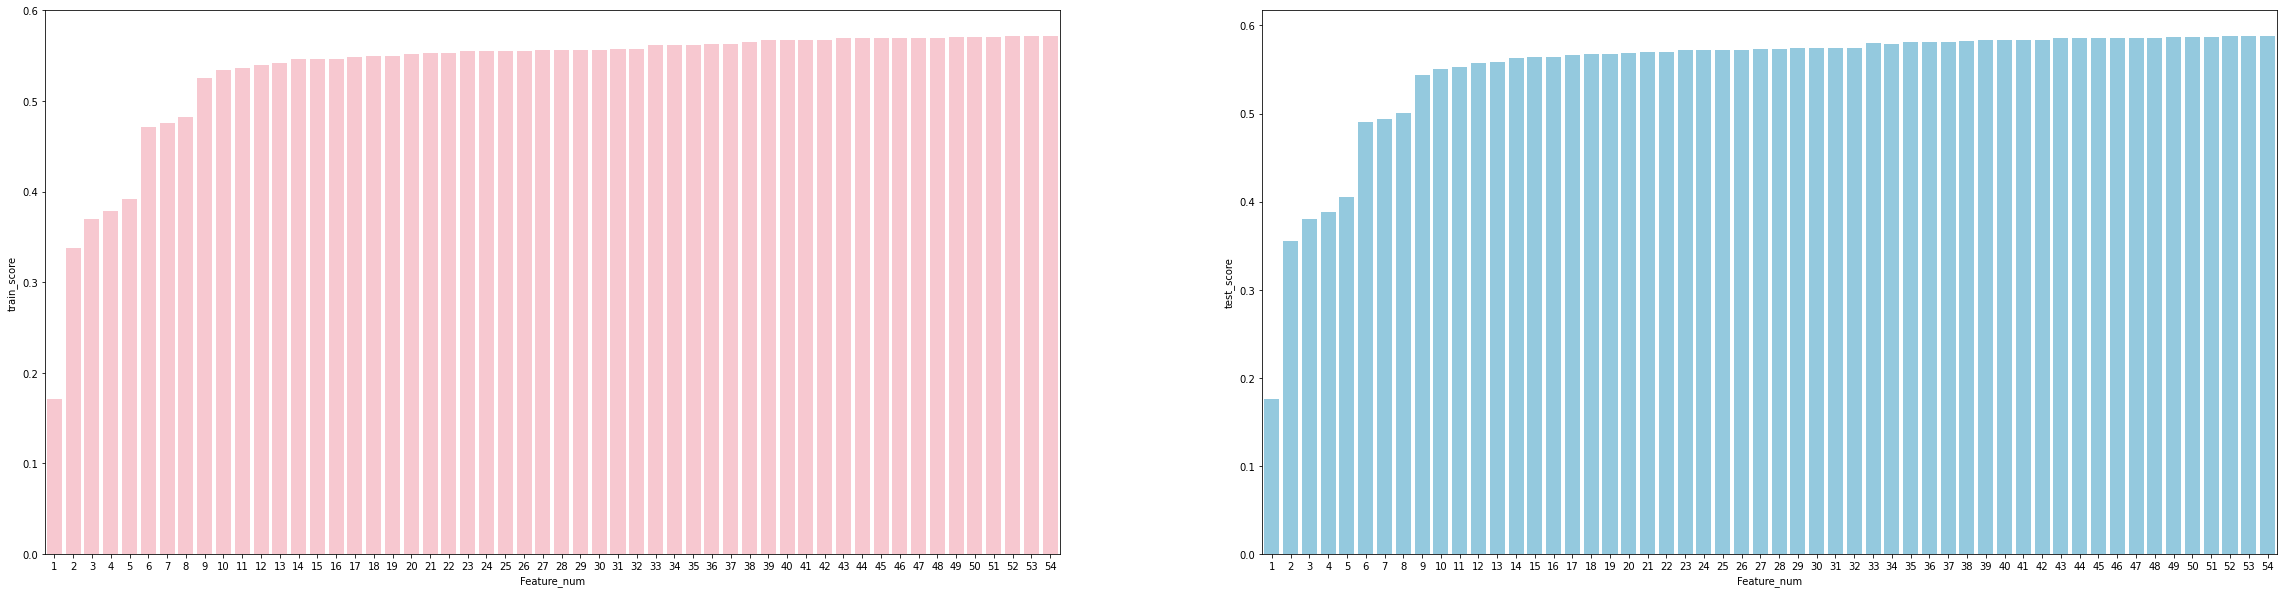

In [289]:
f, ax = plt.subplots(1, 2, figsize = (40, 10))
sns.barplot(data = rid_score, x = 'Feature_num', y = 'train_score', ax = ax[0], color = 'pink');
sns.barplot(data = rid_score, x = 'Feature_num', y = 'test_score', ax = ax[1], color = 'skyblue');

Feature의 수가 점수에 영향을 많이 미친다는 점을 확인 하였다.

그렇다고 모든 feature를 넣은 데이터 결과가 제일 높진 않았다.

이 결과로 나온 best ridge regression model은 53개의 feature를 사용하고, cv = 5, alpha는 0.0001을 사용한 트레이닝 모델이다.

트레인 스코어는 0.571463 이고,

테스트 스코어는 0.587800 입니다.


In [311]:
# alpha가 0인 값과 비교
X = X_train
y = y_train
select = SelectKBest(f_regression, k=53).fit(X, y)
mask = select.get_support()
ridge = RidgeCV(alphas = [0.0001], normalize = True, cv = 5).fit(X[X.columns[mask]], y)
print('alpha = 0.0001 일 때')
print('53개의 feature, cv = 5, alpha = 0.0001 일 때 트레인 점수 :', ridge.score(X[X.columns[mask]], y))
print('53개의 feature, cv = 5, alpha = 0.0001 일 때 테스트 점수 :', ridge.score(X_test[X_test.columns[mask]], y_test))
a = ridge.score(X_test[X_test.columns[mask]], y_test)
ridge = RidgeCV(alphas = [0], normalize = True, cv = 5).fit(X[X.columns[mask]], y)
print('alpha = 0 일 때')
print('53개의 feature, cv = 5, alpha = 0 일 때 트레인 점수 :', ridge.score(X[X.columns[mask]], y))
print('53개의 feature, cv = 5, alpha = 0 일 때 테스트 점수 :', ridge.score(X_test[X_test.columns[mask]], y_test))
b = ridge.score(X_test[X_test.columns[mask]], y_test)
print('alpha가 0 일 때와 0.0001 일 때 비교')
print('alpha가 0 일 때 보다 0.0001 일 때 점수가 더 ' + '높다'*(a-b > 0) + '낮다'*(a-b < 0));

alpha = 0.0001 일 때
53개의 feature, cv = 5, alpha = 0.0001 일 때 트레인 점수 : 0.5714629052152304
53개의 feature, cv = 5, alpha = 0.0001 일 때 테스트 점수 : 0.5877997603677437
alpha = 0 일 때
53개의 feature, cv = 5, alpha = 0 일 때 트레인 점수 : 0.571449160578476
53개의 feature, cv = 5, alpha = 0 일 때 테스트 점수 : 0.5877572922968386
alpha가 0 일 때와 0.0001 일 때 비교
alpha가 0 일 때 보다 0.0001 일 때 점수가 더 높다


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


alpha가 0 일 때 보다 0.0001 일 때 점수가 미세하게 더 높다

In [312]:
a-b

4.2468070905132826e-05

#Ridge, LinearRegression 차이점 !

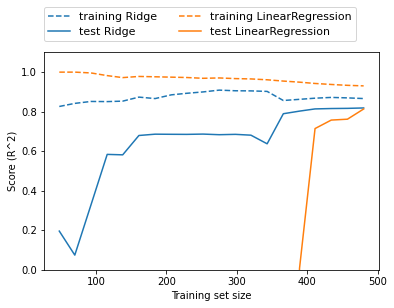

In [58]:
# !pip install mglearn
import mglearn
mglearn.plots.plot_ridge_n_samples()

Ridge는 Training set의 크기가 적어도 어느정도 점수가 나오지만

LinearRegression는 sample의 갯수가 400개 이하일때는 거의 트레이닝이 되지 않는다고 볼수 있다.